## Table of Content
   


1. [Data Exploration](#cell_exploration)


2. [Sentiment Analysis](#cell_sentiment)


3. [Topic Modeling](#cell_TopicModeling)

 


<a id = "cell_exploration"></a>
### 2. Data Exploration


In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=2d396b82bd7de408e344ae76f5e3433392e8e921c049558631210af4d675df9c
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:

import pandas as pd
#Library to seperate month and year from the coulum
import datetime   

#ploting charts libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot

#############Text Processing Libraries####################
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import *
from itertools import chain

import codecs
from nltk.corpus import stopwords 
nltk.download('stopwords')

from os import path
from PIL import Image
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3>Missing values </h3>
The dataset has different columns out of which 'Year_Month' column has missing values recorded. The missing values are discarded form the column as the number of missing values are negligible with respect to the record.

In [ ]:

missing_values=["missing"]
dl=pd.read_csv(r'C:\Ayushi\tri4\DisneylandReviews.csv',encoding = "ISO-8859-1", na_values=missing_values )
dl.isnull().sum()  #display missing values in the dataset


Review_ID               0
Rating                  0
Year_Month           2613
Reviewer_Location       0
Review_Text             0
Branch                  0
dtype: int64

In [ ]:
dl.dropna(subset=['Year_Month'],how='any').shape

dl['Year_Month'].value_counts(dropna=False) #missing values are dropped for the 'year_month' column
dl.head()

Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                         Review_Text               Branch  
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4  the location is not in the city, took around 1...  Disneyland_HongKong

<H4> Obtaining month from mixed data </h4>
To understand the period of data the 'Year_Month' column has been split into months and years[(Extract month and year to a new column in Pandas | Data Interview Questions, 2020)].

In [ ]:
#I have seperated Months from the Year_Month column 
dl['Year_Month']=pd.to_datetime(dl["Year_Month"]) 
dl['month']=dl["Year_Month"].dt.month_name()  # using datatime library name of month is captured


<h3>2.A: Which period of the year is the peak time for visitor to visit each theme park? </h3>

Text(0, 0.5, 'Total count of visitors')

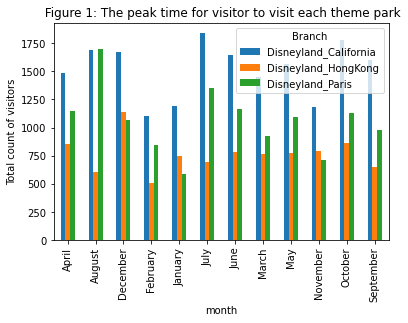

In [ ]:
dl.groupby(['month', 'Branch'])['month'].count().unstack('Branch').plot(kind='bar')
plt.title(" Figure 1: The peak time for visitor to visit each theme park")
plt.ylabel("Total count of visitors")



<h5> Interpretation-A</h5>
It’s always an excellent time to spend at Walt Disney. The Disney land Paris has June to August as the potential months with the high number of visitor’s recorded while January month has the lowest visitors recorded (refer Figure 1). 
However, as per the chart (Figure 1) peak months observed for Disney land, Hong Kong is from mid-October to April end. As per one of the surveys when the weather is relatively dry, and temperatures are comfortable (Bricker, 2020). December is observed as the most crowed of all, followed by October and November. February is recorded as the least crowed month for Disney land Hong Kong. 
Disney land California has visitors all over the year, but the most preferred period by visitors is from June to October as per the insights from the data (When to Visit, 2020). Very few visitor’s visit to Disney land California in the month of February. 


<H3>2.B : Who are the major groups of visitors at each Disneyland Park?</H3>

In [ ]:
print("Table 1: The major groups of visitors to Disneyland Park")
Major_group=dl['Reviewer_Location'].value_counts()[:5]
Major_group.head()

Table 1: The major groups of visitors to Disneyland Park


United States     14551
United Kingdom     9751
Australia          4679
Canada             2235
India              1511
Name: Reviewer_Location, dtype: int64

In [ ]:
print("Table 2: The major groups of visitors at each Disneyland Park")
groups=dl.groupby(['Branch','Reviewer_Location']).size().reset_index(name='Count').sort_values(['Branch','Count'],ascending=[1,0]).groupby('Branch').head(3)
groups

Table 2: The major groups of visitors at each Disneyland Park


Branch Reviewer_Location  Count
107  Disneyland_California     United States  12339
3    Disneyland_California         Australia   2448
14   Disneyland_California            Canada   1842
114    Disneyland_HongKong         Australia   1636
155    Disneyland_HongKong             India   1083
190    Disneyland_HongKong       Philippines    991
352       Disneyland_Paris    United Kingdom   7992
353       Disneyland_Paris     United States   1331
234       Disneyland_Paris         Australia    595

Figure 2: The major groups of visitors at each Disneyland Park


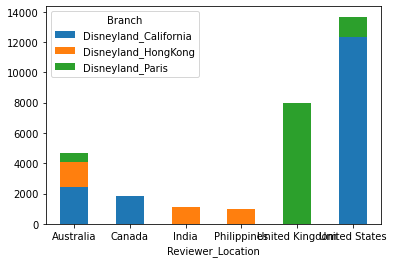

In [ ]:
print("Figure 2: The major groups of visitors at each Disneyland Park")
a.pivot_table(index='Reviewer_Location', columns='Branch', values='Count', aggfunc='sum').plot.bar(rot=0, stacked=True)


<h5> Interpretation-B</h5>
Many people are visiting Disney land at various period from different countries. As from the figure (see Table 1), we can see that in a general major group of visitors to all theme parks are from United States, United Kingdom, Australia, Canada, India. We can also observe from the figure (See Figure 2) that Disneyland California has most visitors from the United States itself then from Canada and Australia.
Whereas, Disneyland Hong Kong as a significant group of visitor’s from Australia followed by India and the Philippines. 
Disneyland Paris as reported primary visitor’s from the United Kingdom than the United States followed by Australia.



<h3>2.C : Which theme park received highest ratings?</h3>

Text(0, 0.5, 'Total count')

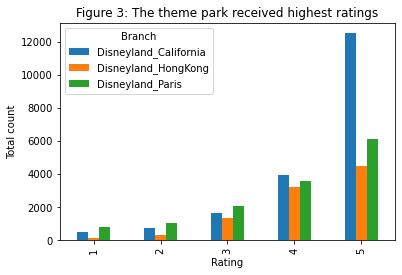

In [ ]:

dl.groupby(['Rating', 'Branch'])['Rating'].count().unstack('Branch').plot(kind='bar')
plt.title("Figure 3: The theme park received highest ratings")
plt.ylabel("Total count")



<h5> Interpretation-C</h5>
From the above chart (see Figure 3), it can be seen that Disneyland California has received the highest rating, followed by Disneyland Paris and then Disneyland Hong Kong. The figure depicts that many people like Disneyland California due to excellent adventure and amazing long rides. Kids visit the park during the daytime and love the fast rides and parade. Few theme parks have expensive rates for a few facilities and services (see Figure 4). 

<H3>Exploring customer Review </h3>

Figure 4: Frequent review found


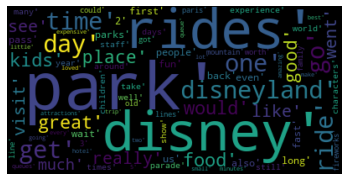

In [ ]:
#Subsetting "Review_Text" 
Sub_set=dl.loc[:,'Review_Text']
Sub_set

#tokenization

lower = []
for item in dl['Review_Text']:
    lower.append(item.lower())           # lowercase description
    

tokens = []
tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?") #Tokenization of words

for word in lower:
    tokens.extend(tokenizer.tokenize(word))   # Placing all tokens in the list 'tokens'
    
#tokens

#to eliminate stop_words from 'tokens'
stop_words = set(stopwords.words('english')) 

#calculating the frequency of each word
freq1 = []
freq =[tok for tok in tokens if tok not in stop_words] #stop words are removed 
freq1=FreqDist(freq)
freq1

#code to find top common words with document frequencies > 6000
h_freq=[]
top_words=freq1.most_common()
for k,v in top_words:
    if v>6000:
        h_freq.append(k)

W_cloud=WordCloud().generate(str(h_freq))
plt.figure()
plt.imshow(W_cloud, interpolation="bilinear")
plt.axis("off")
print("Figure 4: Frequent review found")
plt.show()

<H5> Interpretation based on customer feedback </H5>
Review of customers was visualised to have a better understanding of the visitor’s sentiments towards the theme park by displaying the most frequent review words from the feedback section. From the WordClould chart ( see Figure 4) we can say that kids enjoy the long and fast rides in the Disney land park. People’s first experience to the Disney land theme park has been adventurous and enjoyable. From the chart, it can be seen that visitors have spent day time pretty great in the theme parks by enjoying food, rides, and parades

<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis


Sentiment Analysis guides us to understand people emotions in a better and more precise way.


<H3> 3.1 Machine learning-based model</h3>
Text classification is one of the most prominent steps in text mining. The text analytics is performed using NLTK python library. All the text data is pre-processed before applying to the model. The text data is tokenized, and stopwords are removed.  
The classification model is built to predict a rating for the Disney land using visitor's reviews. Multinomial Naive Bayes classifier is built using training and testing data.

<H4> Bag of Words </H4>
Bag of Words is a fundamental way of extracting features from the review column ("(Tutorial) Text ANALYTICS for Beginners using NLTK", 2020). As we cannot use the set of review text directly for model building, we have converted text into the matrix of occurrence of words within a document. Before Bow is implemented, review text is tokenized using RegexpTokenizer.We have used CountVectorizer to note the existence of terms within a document.  

In [ ]:
#Bag of Words Features
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token1 = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token1.tokenize)
text_counts= cv.fit_transform(dl['Review_Text'])

<H4> Test and Train data split </h4>
To understand model performance, the dataset is split into a training set, and a test set is a right approach. The sampling data is divided into two segments of 70%(training) and 30%(testing).

In [ ]:
#Model Construction:Split the data for hold-out test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, dl['Rating'], test_size=0.3, random_state=1)

<h4>Train and evaluate Naive Bayes classifier</h4>
Naive Bayes model is build to predict rating by training the model using training data using fit() and have predicted the rating column on the test dataset using predict().
sklearn library is used to get the classification report, and confusion matrix for the model developed.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, predicted))
print("********************************************************")
print(classification_report(y_test, predicted))


MultinomialNB Accuracy: 0.596389778854419
Confusion Matrix:
 [[  37   45  250   72   36]
 [  17   31  320  185   85]
 [   9   24  426  580  433]
 [   3    6  204 1071 1959]
 [   9    3   98  827 6067]]
********************************************************
              precision    recall  f1-score   support

           1       0.49      0.08      0.14       440
           2       0.28      0.05      0.08       638
           3       0.33      0.29      0.31      1472
           4       0.39      0.33      0.36      3243
           5       0.71      0.87      0.78      7004

    accuracy                           0.60     12797
   macro avg       0.44      0.32      0.33     12797
weighted avg       0.56      0.60      0.56     12797



<H5>Evaluate and Performance of the Model</h5>

Well, from the above model, we have got a model accuracy of 59.63% using Bag of Words, which is not considered as excellent accuracy. As we have observed that the data is unbalanced as more reviews sentiments are positive as compared to negative( refer Section 3: Figure 5). This has created an imbalance in data which is affecting the performance of the model. To improve model performance, we need to use upsampling techniques to handle unbalanced data.

As precision is the ratio of correctly predicted positive results to the total predicted positive observations, it can be seen that for rating '1' 49% of
observations are predicted correctly out of total correctly predicted observations, while for rating '2', '3', '4' and '5' has 28%, 33%, 39% and 71% of correctly predicted observations, respectively.

Now, Recall is the ratio of correctly predicted positive results to all observations in an actual class; it is seen that for rating '1'  8% of
they are correctly classified by the classification model out of total predictions, while for rating '2', '3', '4' and '5' has 5%, 29%, 33% and 87% of correctly classified observations, respectively.


<h4>Sentiments prediction using rating

In [ ]:
Neutral_Rating = []
Postive_Rating = [] 
Negative_Rating = []
for t in (dl['Rating']):
    
  
    if t>=4:
        Postive_Rating.append(1)
    else:
        Postive_Rating.append(0)
    if t<=2:
        Negative_Rating.append(1)
    else:
        Negative_Rating.append(0) 
 
    if t==3:
        Neutral_Rating.append(1)
    else:
        Neutral_Rating.append(0)
     
    
#Add sentiment indixes to the original data frame.
dl['Positive_R'] = Postive_Rating 
dl['Negative_R'] = Negative_Rating
dl['Neutral_R']  = Neutral_Rating


In [ ]:
print("Table 3: Tabulated sentiments predicted from rating")
CountByClass = dl.groupby('Branch').sum()[['Positive_R','Negative_R','Neutral_R']]
CountByClass1 = dl.groupby('Branch').count()[['Review_ID']]
CountByClass["Total"] = CountByClass1['Review_ID']
CountByClass 

Table 3: Tabulated sentiments predicted from rating


Positive_R  Negative_R  Neutral_R  Total
Branch                                                         
Disneyland_California       16499        1246       1661  19406
Disneyland_HongKong          7747         508       1365   9620
Disneyland_Paris             9675        1872       2083  13630

Text(0, 0.5, 'Total count of visitors')

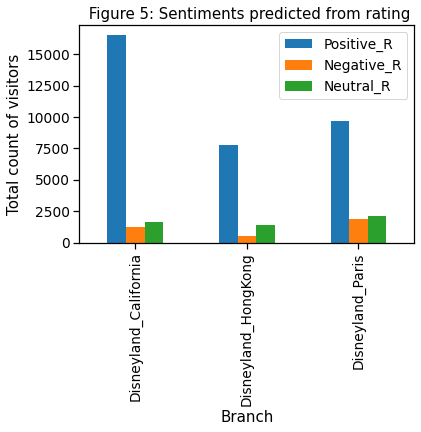

In [ ]:

CountByClass[['Positive_R','Negative_R','Neutral_R']].plot(kind='bar')
plt.title(" Figure 5: Sentiments predicted from rating")
plt.ylabel("Total count of visitors")

<H3> 3.2 Lexicon-based Sentiment Analysis</h3>
Lexicon based model is used to extract visitor's opinions about Disneyland using review text. SentimentIntensityAnalyzer is used to capture the sentiments of the visitors. 

<h4> Data Pre-Processing</h4>
We have taken care of all the missing values in the review column by discarding the missing value data.

Once this all is performed data is prepared for text pre-processing. We have cleaned the text review by discarding all elements except alphabets. In pre-processing of review text: Transform cases ( to make all characters to lower case), Tokenize ( to split data into terms), Stem (to transform the words to root form), Filter stop words (non-informative terms are removed) and Filter tokens ( to eliminate short or long terms) operations have been performed. Words with more than 3 alphabets are kept, and the review is appended in the ‘Cleaned_doc’ variable. Stop words are removed from the tokenized data to clean it better. 

In [ ]:
from nltk.stem import PorterStemmer #Stemming Package  
import re  #Regular expression operation package
# first, we import the relevant modules from the NLTK library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

dl = dl[~dl['Review_Text'].isnull()] #Remove the rows where “Review Text” were missing.

#Defind a function to clean text
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

dl['Review_Text'] = preprocess(dl['Review_Text']) #Clean text

porter = PorterStemmer()

documents = dl['Review_Text']
Cleaned_doc = []
for r in range(len(documents)):
    review = documents[r]
    try:
        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review) 
        # make all text lowercase
        review = review.lower()
        # apply tokenization
        Tokens = review.split()
        # apply stemming operation (Optional)
        for t in range(len(Tokens)):
           Tokens[t] = porter.stem(Tokens[t])
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3] 
        review = ' '.join(Filtered_token)        
    except:
        continue
    #Save claned text
    Cleaned_doc.append(review)  
    
    
    from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item) 


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<h3>3.D :How to automatically summarize visitors’ sentiments from reviews?</h3>

SentimentIntensityAnalyzer has been used to calculate the sentiments of the review column. polarity_scores() technique is used to obatian the polarity indices. We have got all the negative, positive , neutral and compound values for each lexicon. The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). The compound values for lexicons is below '-0.5' are categorised as negative and more than '+0.5' as positive.

In [ ]:
#Lexicon-based Sentiment Analysis
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
sid = SentimentIntensityAnalyzer()
NeutralIndex = []
PostiveIndex = []  #Index to indicate positive sentiment.
NegativeIndex = [] #Index to indicate negative sentiment.
for r in range(len(dl['Review_Text'])):
    rev = dl['Review_Text'][r] 
    # Compute Sentiment Score for each review
    SentimentScores = sid.polarity_scores(rev) 
    # Generate sentiment index based on sentiment score, We set 0.3 as threshold for strong sentiments
    if SentimentScores['compound']> 0.5:
        PostiveIndex.append(1)
    else:
        PostiveIndex.append(0)
      
    if SentimentScores['compound']< -0.5:
        NegativeIndex.append(1)
    else:
        NegativeIndex.append(0) 
 
    if SentimentScores['compound']> -0.5 and SentimentScores['compound']< 0.5 :
        NeutralIndex.append(1)
    else:
        NeutralIndex.append(0) 
    
#Add sentiment indixes to the original data frame.
dl['Positive'] = PostiveIndex 
dl['Negative'] = NegativeIndex
dl['Neutral']  = NeutralIndex
dl

Review_ID  Rating Year_Month     Reviewer_Location  \
0      670772142       4 2019-04-01             Australia   
1      670682799       4 2019-05-01           Philippines   
2      670623270       4 2019-04-01  United Arab Emirates   
3      670607911       4 2019-04-01             Australia   
4      670607296       4 2019-04-01        United Kingdom   
...          ...     ...        ...                   ...   
42651    1765031       5        NaT        United Kingdom   
42652    1659553       5        NaT                Canada   
42653    1645894       5        NaT          South Africa   
42654    1618637       4        NaT         United States   
42655    1536786       4        NaT        United Kingdom   

                                             Review_Text               Branch  \
0      If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1      Its been a while since d last time we visit HK...  Disneyland_HongKong   
2      Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3      HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4      the location is not in the city, took around 1...  Disneyland_HongKong   
...                                                  ...                  ...   
42651  i went to disneyland paris in july 03 and thou...     Disneyland_Paris   
42652  2 adults and 1 child of 11 visited Disneyland ...     Disneyland_Paris   
42653  My eleven year old daughter and myself went to...     Disneyland_Paris   
42654  This hotel, part of the Disneyland Paris compl...     Disneyland_Paris   
42655  I went to the Disneyparis resort, in 1996, wit...     Disneyland_Paris   

       month  Positive  Negative  Neutral  Positive_R  Negative_R  Neutral_R  
0      April         1         0        0           1           0          0  
1        May         1         0        0           1           0          0  
2      April         1         0        0           1           0          0  
3      April         1         0        0           1           0          0  
4      April         0         0        1           1           0          0  
...      ...       ...       ...      ...         ...         ...        ...  
42651    NaN         1         0        0           1           0          0  
42652    NaN         1         0        0           1           0          0  
42653    NaN         1         0        0           1           0          0  
42654    NaN         1         0        0           1           0          0  
42655    NaN         1         0        0           1           0          0  

[42656 rows x 13 columns]

In [ ]:
#Count Positive,Neutral and Negative Reviews by branch

SentimentCountByClass = dl.groupby('Branch').sum()[['Positive','Negative','Neutral']]
CountByClass = dl.groupby('Branch').count()[['Review_ID']]
SentimentCountByClass["Total"] = CountByClass['Review_ID']
SentimentCountByClass 

Positive  Negative  Neutral  Total
Branch                                                   
Disneyland_California     15916      1020     2470  19406
Disneyland_HongKong        7879       371     1370   9620
Disneyland_Paris          10743      1216     1671  13630

Text(0, 0.5, 'Total count of visitors')

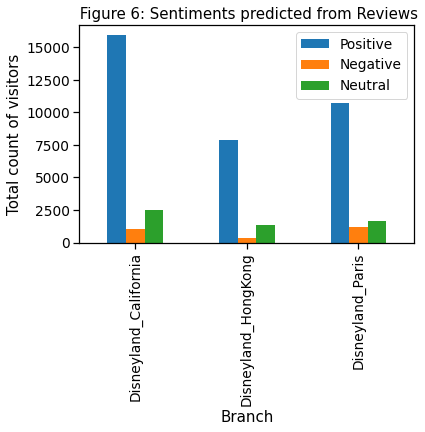

In [ ]:
import matplotlib.pyplot as plt
SentimentCountByClass[['Positive','Negative','Neutral']].plot(kind='bar')
plt.title(" Figure 6: Sentiments predicted from Reviews")
plt.ylabel("Total count of visitors")

<h5> Interpretation-D</h5>
From the above visualisation, it can be said that most of the reviews visitors have provided are positive (refer to Section 3:Figure 6). As per Figure 5 in section 3, sentiments captured using rating and sentiments captured using review text have almost similar outcomes. Very few negative reviews have been recorded by the model overall. Disneyland California has most of the positive reviews followed by neutral sentiments as compared to the other two theme parks. Thus, Disneyland California has maximum visitors with positive emotions.  Disneyland Hong Kong has moderate positive reviews and very few negative reviews. It can be seen that very few people have visited  Disneyland Hong Kong. Disneyland Paris has more than 10000 positive reviews and moderate neutral reviews. Hence, it can be said that many visitors mostly like Disneyland California theme park due to its originality and many fascinating rides and toys.  

<h3>3.E :What are visitors’ sentiments toward theme parks aspects such as facilities and services?</h3>
    

All the emotions were captured. Nouns from the text were extracted, and a few terms which relate to facilities and services were picked and used as aspects for model building. 

In [ ]:
############################### E  ##################
#Check the overall sentiment
sid = SentimentIntensityAnalyzer()
c=[]
for r in range(len(dl['Review_Text'])):
    rev = dl['Review_Text'][r] 
    # Compute Sentiment Score for each review
    OverallSen = sid.polarity_scores(rev) 
    c.append(OverallSen)
    

In [ ]:
import pandas
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
rev=rev.replace(',','.')
re=[]
for r in (dl['Review_Text']):
    sents =  sent_tokenize(r)
    re.append(sents)

f=pd.Series(re)

h=[]
for i in f:
    h.extend(i)

scores = []
for s in range(len(h)):
       scores.append(sid.polarity_scores(h[s]))
[s for s in scores] #Show sentiment score of individual trunks
    
    

    
    
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.7056},
 {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.3919},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.5242},
 {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.858},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.4738},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.582, 'neu': 0.418, 'pos': 0.0, 'compound': -0.6351},
 {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.6892},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.4738},
 {'neg': 0.31, 'neu': 0.494, 'pos': 0.196, 'compound': -0.3846},
 {'neg': 0.162, 'neu': 0.448, 'pos': 0.38

In [ ]:
from statistics import mean 
#Define function to compute sentiment score for aspect
def aspect_sentiment(aspect,h,scores):
    AspSen = []
    for s in range(len(h)):
        #Check if the aspect is mentioned in the text trunk
        Index = h[s].find(aspect)  
        if Index > 0:
            AspSen.append(scores[s])
    Pos = [AspSen[x]['pos'] for x in range(len(AspSen))]
    Neg = [AspSen[x]['neg'] for x in range(len(AspSen))]
    #Return average of sentiment scores of aspect
    return [round(mean(Pos),3), round(mean(Neg),3)] 
            
print('facilities: ', aspect_sentiment('facilities',h,scores))    
print('services: ', aspect_sentiment('services',h,scores))   
#print('size: ', aspect_sentiment('size',sents,scores))

facilities:  [0.166, 0.055]
services:  [0.117, 0.046]


In [ ]:
#Define a function to compute overall sentiment by aspect
def aspect_sentiment(aspect,reviewtext):
    PositiveIndex = []
    NegativeIndex = []
    # For each review in the data set
    for rev in (reviewtext):
        try:
            sens =  sent_tokenize(rev)
        except:
            continue  
        #Compute sentiment scores by each sentence.
        ReviewLevelSentiment = []
        for s in range(len(sens)):
            IndexAspect = sens[s].find(aspect) 
            if IndexAspect > 0:
                ReviewLevelSentiment.append(sid.polarity_scores(sens[s]))                    
                    
        #Aggregate sentiment scores for each review
        try:
            Pos = mean([ReviewLevelSentiment[x]['pos'] for x in range(len(ReviewLevelSentiment))])
            Neg = mean([ReviewLevelSentiment[x]['neg'] for x in range(len(ReviewLevelSentiment))])  
        except:
            Pos = 0
            Neg = 0
            
        # Generate sentiment index based on sentiment score, We set 0.3 as threshold for strong sentiments
        if Pos > 0.3:            
            PositiveIndex.append(1)
        else:
            PositiveIndex.append(0)
            
        if Neg > 0.3:
            NegativeIndex.append(1)
        else:
            NegativeIndex.append(0)
                
    return [round(sum(PositiveIndex)/len(reviewtext),3), round(sum(NegativeIndex)/len(reviewtext),3)] 

In [ ]:
#taking Nouns out from the review tokens
#h=nltk.pos_tag(tokens)
#noun=[word for word,pos in h if (pos=="NN")]
#noun


#Define Aspects to compute sentiment
aspects = ['services','facilities','hotel',
          'park','parade','castle', 'food',
            'bus','water','restaurant','cafe',
            'staff','train','ticket','cruise','ride',
            'roller coaster', 'building','hotel',
            'toy','restaurant', 'shopping','transport'] 

#Extract Reviews for Jeans only and compute aspect sentiments

print('Sentiment proportions for Disneyland_HongKong:')
Hong_Kong_Reviews = dl.loc[dl['Branch'] == 'Disneyland_HongKong']  
SentimentScores_Hong_Kong = []
for a in range(len(aspects)):
    SentimentScores_Hong_Kong.append(aspect_sentiment(aspects[a],Hong_Kong_Reviews['Review_Text']))
    print(aspects[a])
    print(SentimentScores_Hong_Kong[a])
    
    
        

    
print('--------------------------------')
#Extract Reviews for Knits only and compute aspect sentiments 
print('Sentiment proportions for Disneyland_California:')
Disneyland_California_Reviews = dl.loc[dl['Branch'] == 'Disneyland_California']  
SentimentScores_Disneyland_California = []
for a in range(len(aspects)):
    SentimentScores_Disneyland_California.append(aspect_sentiment(aspects[a],Disneyland_California_Reviews['Review_Text']))
    print(aspects[a])
    print(SentimentScores_Disneyland_California[a])
    
    
print('--------------------------------')
#Extract Reviews for Knits only and compute aspect sentiments 
print('Sentiment proportions for Disneyland_Paris:')
Disneyland_Paris_Reviews = dl.loc[dl['Branch'] == 'Disneyland_Paris']  
SentimentScores_Disneyland_Paris = []
for a in range(len(aspects)):
    SentimentScores_Disneyland_Paris.append(aspect_sentiment(aspects[a],Disneyland_Paris_Reviews['Review_Text']))
    print(aspects[a])
    print(SentimentScores_Disneyland_Paris[a])

     

    

Sentiment proportions for Disneyland_HongKong:
services
[0.0, 0.0]
facilities
[0.004, 0.0]
hotel
[0.003, 0.0]
park
[0.044, 0.002]
parade
[0.048, 0.002]
castle
[0.005, 0.001]
food
[0.024, 0.005]
bus
[0.003, 0.001]
water
[0.002, 0.0]
restaurant
[0.006, 0.001]
cafe
[0.001, 0.0]
staff
[0.025, 0.002]
train
[0.019, 0.001]
ticket
[0.005, 0.001]
cruise
[0.002, 0.0]
ride
[0.076, 0.002]
roller coaster
[0.005, 0.0]
building
[0.001, 0.0]
hotel
[0.003, 0.0]
toy
[0.003, 0.0]
restaurant
[0.006, 0.001]
shopping
[0.003, 0.0]
transport
[0.003, 0.0]
--------------------------------
Sentiment proportions for Disneyland_California:
services
[0.001, 0.0]
facilities
[0.001, 0.0]
hotel
[0.003, 0.0]
park
[0.068, 0.002]
parade
[0.03, 0.001]
castle
[0.003, 0.0]
food
[0.032, 0.004]
bus
[0.008, 0.001]
water
[0.004, 0.0]
restaurant
[0.006, 0.0]
cafe
[0.001, 0.0]
staff
[0.034, 0.001]
train
[0.003, 0.001]
ticket
[0.004, 0.0]
cruise
[0.001, 0.0]
ride
[0.067, 0.003]
roller coaster
[0.002, 0.0]
building
[0.001, 0.0]
hot

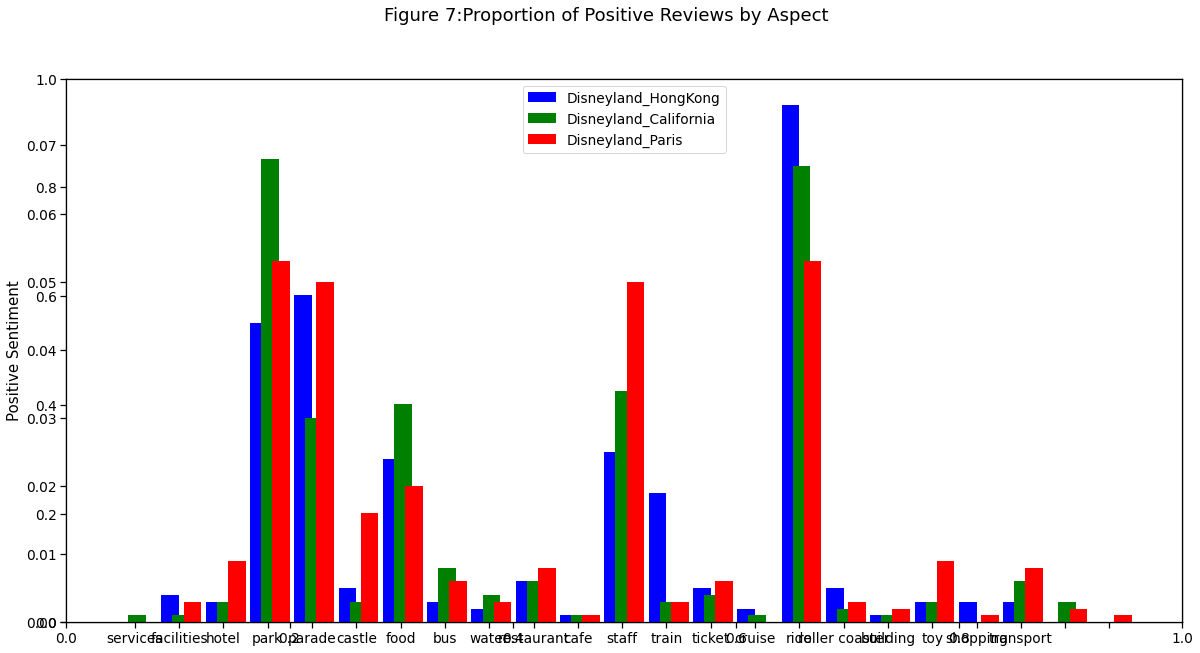

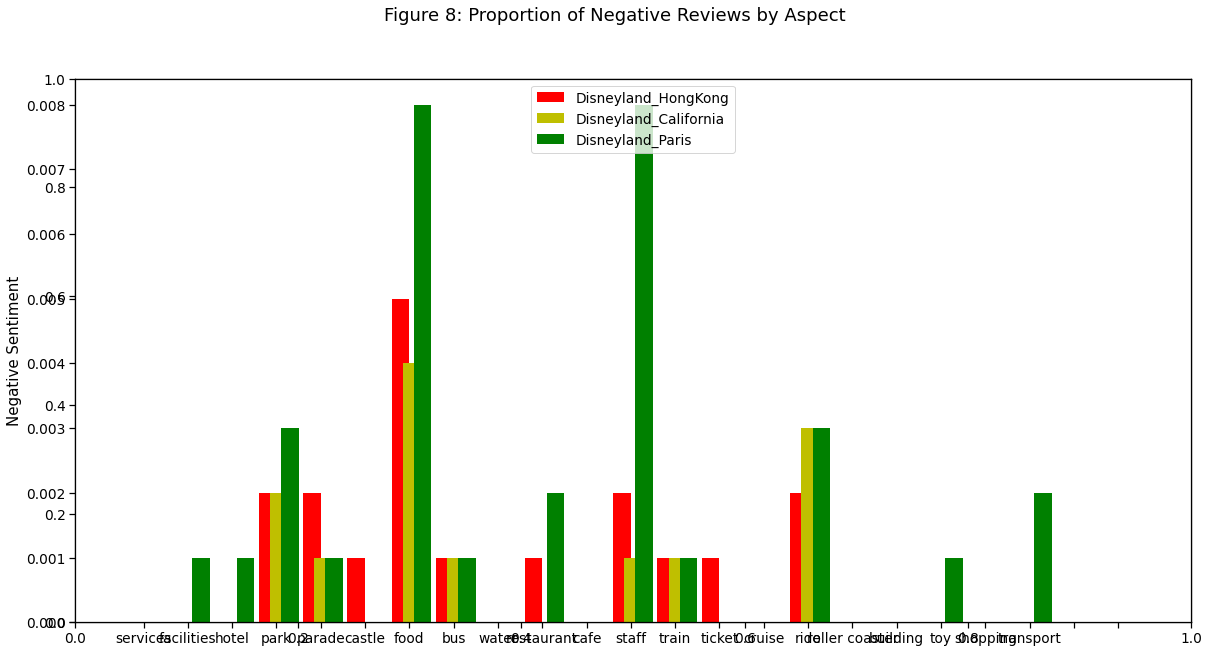

In [ ]:
import numpy
from matplotlib import pyplot

PosHong_Kong = [SentimentScores_Hong_Kong[x][0] for x in range(len(SentimentScores_Hong_Kong))]
NegHong_Kong = [SentimentScores_Hong_Kong[x][1] for x in range(len(SentimentScores_Hong_Kong))]

PosDisneyland_California = [SentimentScores_Disneyland_California[x][0] for x in range(len(SentimentScores_Disneyland_California))]
NegDisneyland_California = [SentimentScores_Disneyland_California[x][1] for x in range(len(SentimentScores_Disneyland_California))] 

PosDisneyland_Paris = [SentimentScores_Disneyland_Paris[x][0] for x in range(len(SentimentScores_Disneyland_Paris))]
NegDisneyland_Paris = [SentimentScores_Disneyland_Paris[x][1] for x in range(len(SentimentScores_Disneyland_Paris))]

ind = numpy.arange(len(aspects))  # the x locations for the groups
width = 0.40       # the width of the bars

#Plot figure for positive reviews
figPo, ax = pyplot.subplots(figsize=(20, 10))
#figPo = pyplot.figure() 
ax = figPo.add_subplot(111)

rectsPosHong_Kong = ax.bar(aspects, PosHong_Kong, width, color='b')
rectsPosDisneyland_California = ax.bar(ind+0.25, PosDisneyland_California, width, color='g')
rectsPosDisneyland_Paris = ax.bar(ind+0.50, PosDisneyland_Paris, width, color='r')
   
ax.set_ylabel('Positive Sentiment')
ax.set_xticks(ind+0.5*width) 
ax.legend( (rectsPosHong_Kong[0], rectsPosDisneyland_California[0],rectsPosDisneyland_Paris[0]), ('Disneyland_HongKong','Disneyland_California','Disneyland_Paris'),loc='upper center' )
pyplot.suptitle('Figure 7:Proportion of Positive Reviews by Aspect');


#Plot figure for negative reviews
figNe, ax = pyplot.subplots(figsize=(20, 10))
#figNe = pyplot.figure()
ax = figNe.add_subplot(111)

rectsNegHong_Kong = ax.bar(aspects, NegHong_Kong, width, color='r')
rectsNegDisneyland_California = ax.bar(ind+0.25, NegDisneyland_California, width, color='y')
rectsNegDisneyland_Paris = ax.bar(ind+0.50, NegDisneyland_Paris, width, color='g')
   
ax.set_ylabel('Negative Sentiment')
ax.set_xticks(ind+0.5*width) 
ax.legend( (rectsNegHong_Kong[0], rectsNegDisneyland_California[0],rectsNegDisneyland_Paris[0]), ('Disneyland_HongKong','Disneyland_California','Disneyland_Paris'),loc='upper center' )
pyplot.suptitle('Figure 8: Proportion of Negative Reviews by Aspect');

<h5> Interpretation-E</h5>
On visualizing the visitors’ sentiments toward theme parks aspects such as facilities and service, we have found many astonishing outcomes such as:

The first figure -7, shows that:
-	Visitors are more likely to express their sentiments towards rides, parade, infrastructure and food when it comes to providing facilities and services reviews. 
-	Disneyland Hong Kong has received more positive sentiments for facilities such as rides, parades and transport services	like trains within the theme parks. It has moderate water, hotel and staff services.
-	Disneyland California has received more positive sentiments for facilities such as rides, transportation facilities. It has also received most of the positive opinions for services such as water, excellent staff and better shopping options.
-	Disneyland Paris more positive sentiments for facilities like a hotel, cafés and restaurants than the other two theme parks.

The second figure - 8 shows that:
-	Visitor’s did not provide negative sentiments towards buildings, shopping and transportation facilities like cruise and bus for Disneyland Hong Kong. However, they frequently expressed negative feelings towards facilities such as parks parades and ticket services.
-	Visitor’s expressed some negative sentiments toward almost all aspects of Disneyland Paris. Moreover, they frequently expressed negative sentiments towards facilities such as transportation, restaurants and food while negative sentiments for services such as unresponsive staff.
-	Visitor’s expressed very few negative views toward all aspects of Disneyland California.



<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

Topic modelling is the method used to find patterns in the sizeable textual information. It helps to manage and summarize extensive collections of textual data.

<h3>   Latent DirichletAllocation model    </h3>                    
To know the concerns and interests of the visitors, Latent DirichletAllocation model is used to find similar patterns within the text.
LDV is based on Probability Distribution and uses Trem frequency to find patterns in the data.

 <h3> 4.1 Data Pre-Processing</h3>
To prepare the visitor’s review text, we must do pre-processing of textual data to make it for further analysis. For Disneyland dataset, we must perform text parsing. We have cleansed the review column by removing unwanted symbols and strings. We have taken care of all the missing values in the review column by discarding the missing value data.


   Once this all is performed data is prepared for text pre-processing. We have cleaned the text review by discarding all elements except alphabets. In pre-processing of review text: Transform cases ( to make all characters to lower case), Tokenize ( to split data into terms), Stem (to transform the words to root form), Filter stop words (non-informative terms are removed) and Filter tokens ( to eliminate short or long terms) operations have been performed. Words with more than 3 alphabets are kept, and the review is appended in the ‘Cleaned_doc’ variable. Stop words are removed from the tokenized data to clean it better. 
   
   Once the data is prepared, we have taken the Nouns out from the pre-processed data using ‘POS tagset’ (Nouns often express concerns and Interests). Highly frequent and least frequent words are discarded to get a better topic pattern using topic modelling. Then LDA technique is developed to find the top 5 topics from the customer data text. 


In [ ]:
from nltk.stem import PorterStemmer #Stemming Package  
import re  #Regular expression operation package
# first, we import the relevant modules from the NLTK library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

dl = dl[~dl['Review_Text'].isnull()] #Remove the rows where “Review Text” were missing.

#Defind a function to clean text
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

dl['Review_Text'] = preprocess(dl['Review_Text']) #Clean text

porter = PorterStemmer()

documents = dl['Review_Text']
Cleaned_doc = []
for r in range(len(documents)):
    review = documents[r]
    try:
        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review) 
        # make all text lowercase
        review = review.lower()
        # apply tokenization
        Tokens = review.split()
        # apply stemming operation (Optional)
        for t in range(len(Tokens)):
           Tokens[t] = porter.stem(Tokens[t])
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3] 
        review = ' '.join(Filtered_token)        
    except:
        continue
    #Save claned text
    Cleaned_doc.append(review)  
    
    
    from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item) 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h3> 4.2 Part of Speech Tagging</h3>
Here all Nouns are identified using POS tagging from Review text tokens as concerns and interest of the theme park are expressed in nouns. Highly frequent/infrequence words do not carry much value, hence they are discarded.

In [ ]:
import nltk

# doing parts of speech tagging
for f in range(len(Cleaned_doc)):
    each_item = []
    #for t in pos_tagging[f]:
    text = nltk.word_tokenize(Cleaned_doc[f])
    pts[f] = nltk.pos_tag(text)
    Output[f] = [item for item in pts[f] 
          if item[1] == 'NN' or item[1] == 'NNS' or item[1] == 'NNP' or item[1] == 'NNPS'] 
    for wd in Output[f]:
            each_item.append(wd[0])  
    Output[f] = ' '.join(each_item)
    

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data

<42656x25416 sparse matrix of type '<class 'numpy.int64'>'
	with 1893980 stored elements in Compressed Sparse Row format>

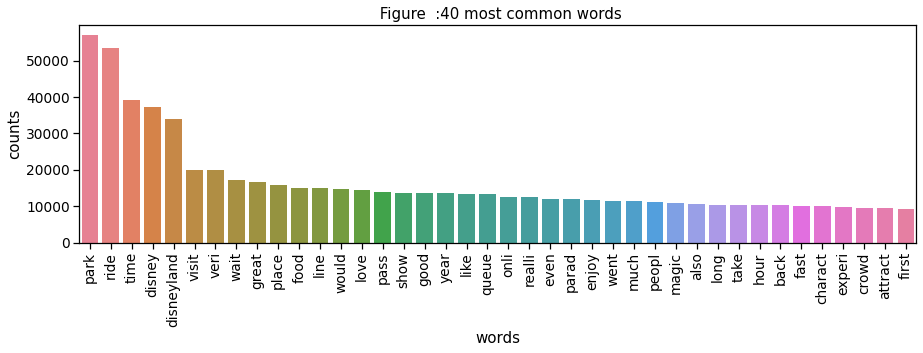

In [ ]:
terms = count_vectorizer.get_feature_names()
import numpy as np
import seaborn as sns
# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]
    
#terms=nltk.pos_tag(terms)
#terms=[word for word,pos in terms if (pos=="NN")]
count_dict = (zip(terms, total_counts))

count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words
    
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
    
plt.figure(2, figsize=(15, 4))
plt.subplot(title=' Figure  :40 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [ ]:
#Remove highly frequent (Greater than 30%) and infrequent words (less than 1%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 1800 and total_counts[t] > 50:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

Number of Terms Remained:  2346


<42656x2346 sparse matrix of type '<class 'numpy.int64'>'
	with 691735 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 5
 
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_ 

array([[  0.37290925,  91.02388127,   2.05619688, ...,   0.2069772 ,
         17.6529317 ,  95.92220399],
       [ 52.86938345,  80.02077066,   0.25022207, ...,  77.55945849,
         24.10549871,  46.59758741],
       [ 31.88605386, 145.16263278,  43.99747114, ...,  11.46080219,
          5.33808746,  43.73993335],
       [  0.20509115,  74.33560811,  11.31772052, ...,  52.57089894,
          5.57021331, 102.38509837],
       [ 40.66656229, 109.45710719,  11.37838938, ...,   0.20186317,
         54.33326883,  17.35517688]])

In [ ]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

[[2.18863742e-06 5.34227216e-04 1.20680015e-05 ... 1.21476753e-06
  1.03606619e-04 5.62975906e-04]
 [3.47669938e-04 5.26217909e-04 1.64546445e-06 ... 5.10032279e-04
  1.58518157e-04 3.06426504e-04]
 [2.14901339e-04 9.78347596e-04 2.96528241e-04 ... 7.72419738e-05
  3.59769242e-05 2.94792522e-04]
 [1.46996566e-06 5.32791346e-04 8.11183726e-05 ... 3.76795465e-04
  3.99238201e-05 7.33832625e-04]
 [2.52002444e-04 6.78283509e-04 7.05095729e-05 ... 1.25090517e-06
  3.36692255e-04 1.07546514e-04]]


<h3>4.3.F:What are the concerns and interests of visitors when visiting the theme parks? (define)</h3>

In [ ]:
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
breakfast : 0.007
villag : 0.006
cold : 0.006
bottl : 0.006
french : 0.006
toilet : 0.005
station : 0.005
tower : 0.005
burger : 0.004
brilliant : 0.004

Topic #1:
haunt : 0.011
hopper : 0.009
mansion : 0.009
splash : 0.008
matterhorn : 0.006
caribbean : 0.006
spring : 0.006
stroller : 0.006
singl : 0.005
fantasm : 0.005

Topic #2:
entertain : 0.007
truli : 0.007
memori : 0.007
origin : 0.007
anaheim : 0.006
life : 0.006
perfect : 0.006
detail : 0.006
atmospher : 0.006
disneyworld : 0.005

Topic #3:
rain : 0.010
buzz : 0.009
king : 0.008
mous : 0.008
halloween : 0.008
minni : 0.007
lion : 0.007
stori : 0.007
lightyear : 0.006
favourit : 0.006

Topic #4:
smoke : 0.011
rude : 0.009
guest : 0.008
push : 0.007
custom : 0.006
problem : 0.006
employe : 0.006
disabl : 0.005
issu : 0.005
happen : 0.005


<h5> Interpretation-F</h5>
LDV model has resulted in top 5 topics which focus on the concerns and interest of their visitors.

-Topic 1: The Frozen Village proved to be very popular with the kids, and they have spent a brilliant time in Disney parks. Under this topic visitor's concerns are related to toilets, burger's, breakfast and food etc.

-Topic 2: Visitors have discussed their interest in the mystic mansion as they resembled as a Haunted Mansion. Visitor's concerns were that Disneyland Hongkong did not have the Splash Mountain, Pirates of the Caribbean and Thunder Mountain Railroad ride's like the Disneyland California.

-Topic 3: Visitor's have liked Anaheim Disney park more in terms of entertainment and originality. Visitors have shown concerns about the atmosphere on the particular day of their visit.

-Topic 4: Visitor's have expressed their interest in Halloween shows, taking pictures with Mickey's and Minni and out of all most people's favourite was the Buzz Lightyear Space Ranger's ride. These visitors were concerned about the weather conditions on the day of their visit as most people on rainy days have missed out on many rides and shows.

-Topic 5: Visitor's have expressed their concerns about the high price and cost as they have talked about custom problems. The hospitality at a few theme parks was very disappointing for the guests' as the employees were rude to the visitors, as most of the visitors where adults who got their children to the theme park were interested in smoking zones to chill and have fun.            


In [ ]:
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords 

abil      abov     abund      abus   academi    accept    access  \
0  0.000002  0.000534  0.000012  0.000002  0.000001  0.000894  0.001430   
1  0.000348  0.000526  0.000002  0.000001  0.000210  0.000104  0.001002   
2  0.000215  0.000978  0.000297  0.000001  0.000003  0.000173  0.002394   
3  0.000001  0.000533  0.000081  0.000001  0.000403  0.000026  0.001494   
4  0.000252  0.000678  0.000071  0.000372  0.000001  0.001317  0.002946   

      accid  accommod   accomod  ...  yesterday      york   younger  youngest  \
0  0.000118  0.000561  0.000093  ...   0.000093  0.001550  0.001450  0.000539   
1  0.000004  0.000194  0.000022  ...   0.000153  0.000001  0.000442  0.000246   
2  0.000001  0.000606  0.000110  ...   0.000166  0.000001  0.003257  0.000125   
3  0.000005  0.000104  0.000049  ...   0.000095  0.000031  0.001503  0.000546   
4  0.000250  0.001546  0.000208  ...   0.000354  0.000051  0.000173  0.000180   

   youngster  yourselv     youth     yummi      zero      zone  
0   0.000103  0.000213  0.000013  0.000001  0.000104  0.000563  
1   0.000004  0.000020  0.000001  0.000510  0.000159  0.000306  
2   0.000127  0.000001  0.000279  0.000077  0.000036  0.000295  
3   0.000148  0.000036  0.000002  0.000377  0.000040  0.000734  
4   0.000052  0.000101  0.000062  0.000001  0.000337  0.000108  

[5 rows x 2346 columns]

In [ ]:
TopicDis_Doc = lda.transform(ReducedCount)
df_document_topics = pd.DataFrame(TopicDis_Doc)
df_document_topics

0         1         2         3         4
0      0.022740  0.023143  0.908621  0.022591  0.022906
1      0.007170  0.007139  0.311897  0.552708  0.121086
2      0.539700  0.009312  0.432300  0.009237  0.009451
3      0.013738  0.013678  0.678580  0.013523  0.280480
4      0.052512  0.051606  0.792980  0.051210  0.051693
...         ...       ...       ...       ...       ...
42651  0.941919  0.014674  0.014504  0.014492  0.014411
42652  0.455399  0.483152  0.020483  0.020497  0.020469
42653  0.917488  0.020550  0.020678  0.020857  0.020427
42654  0.827279  0.008215  0.148081  0.008183  0.008243
42655  0.428073  0.168282  0.322272  0.007360  0.074013

[42656 rows x 5 columns]

Topic Probablity distribution by Document: 
 [[0.02273963 0.02314319 0.90862095 0.0225906  0.02290564]
 [0.00717017 0.00713915 0.3118968  0.55270777 0.12108611]
 [0.53969976 0.00931234 0.43230039 0.0092369  0.00945061]
 [0.01373801 0.01367845 0.67858016 0.01352289 0.28048049]
 [0.0525115  0.05160597 0.7929798  0.05120984 0.05169288]]


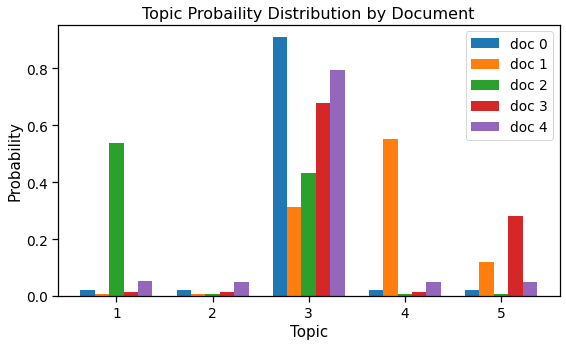

In [ ]:
# Compute the topic distribution for some reviews:
TopicDis_Doc = TopicDis_Doc[0:5]
print('Topic Probablity distribution by Document: \n', TopicDis_Doc)
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Create a new figure
pyplot.figure(figsize=(9,5)) 
pyplot.title('Topic Probaility Distribution by Document', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15   
for i in range(0,5):
    pyplot.bar(Bar_index + i*width, TopicDis_Doc[i].tolist(), width,  label='doc ' + str(i))
    
pyplot.xticks(Bar_index + 2*width, Bar_index)
pyplot.legend()
pyplot.show();

In [ ]:
!pip install gensim 

  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110324 sha256=62d016b106d37a88924db90c718886eb028acacc7bfb3fc143a8174f03ba7291
  Stored in directory: c:\users\ayush\appdata\local\pip\cache\wheels\a8\39\18\46aeab9eaf5317ec7f21924f2d0b11a856ad28207e87060140
Successfully built smart-open
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
Cleaned_doc_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item) 
    print(Cleaned_doc_new[r])

CLEANED TEXT NEW: 
['anywher', 'similar', 'layout', 'familiar', 'fabul', 'fairli', 'move', 'fairli']
['tomorrowland', 'marvel', 'iron', 'newli', 'ironman', 'featur', 'sceneri', 'central', 'kowloon', 'previou', 'buzz', 'lightyear', 'turn', 'minu', 'brand', 'local', 'ocean', 'worst', 'smile', 'face', 'wanna', 'hello', 'suppos', 'brand', 'dont', 'bakeri', 'sweet', 'starbuck']
['thank', 'humid', 'otherwis', 'issu', 'shade', 'unfortun', 'interest', 'themselv', 'extrem', 'longest', 'certain', 'underwhelm', 'choic', 'grand', 'coffe', 'starbuck', 'gift', 'issu', 'toilet', 'everywher', 'togeth']
['compact', 'unfortun', 'mainten', 'present', 'number', 'famou', 'midweek', 'certainli', 'near', 'notic', 'gone', 'dollar', 'souvenir', 'regardless']
['locat', 'citi', 'fine']
['anaheim', 'tokyo', 'call', 'souvenir', 'slightli', 'basic', 'choic', 'accept', 'mostli', 'bottl', 'fountain', 'refil', 'bottl', 'problem', 'problem', 'rude', 'push', 'shove', 'gift', 'forget', 'seat', 'happen', 'worst', 'propert

In [ ]:
import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)
print(id2word.token2id)

{'anywher': 0, 'fabul': 1, 'fairli': 2, 'familiar': 3, 'layout': 4, 'move': 5, 'similar': 6, 'bakeri': 7, 'brand': 8, 'buzz': 9, 'central': 10, 'dont': 11, 'face': 12, 'featur': 13, 'hello': 14, 'iron': 15, 'ironman': 16, 'kowloon': 17, 'lightyear': 18, 'local': 19, 'marvel': 20, 'minu': 21, 'newli': 22, 'ocean': 23, 'previou': 24, 'sceneri': 25, 'smile': 26, 'starbuck': 27, 'suppos': 28, 'sweet': 29, 'tomorrowland': 30, 'turn': 31, 'wanna': 32, 'worst': 33, 'certain': 34, 'choic': 35, 'coffe': 36, 'everywher': 37, 'extrem': 38, 'gift': 39, 'grand': 40, 'humid': 41, 'interest': 42, 'issu': 43, 'longest': 44, 'otherwis': 45, 'shade': 46, 'thank': 47, 'themselv': 48, 'togeth': 49, 'toilet': 50, 'underwhelm': 51, 'unfortun': 52, 'certainli': 53, 'compact': 54, 'dollar': 55, 'famou': 56, 'gone': 57, 'mainten': 58, 'midweek': 59, 'near': 60, 'notic': 61, 'number': 62, 'present': 63, 'regardless': 64, 'souvenir': 65, 'citi': 66, 'fine': 67, 'locat': 68, 'accept': 69, 'anaheim': 70, 'basic': 

In [ ]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]
print(Corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#

#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100)

#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.013*"santa" + 0.010*"caribbean" + 0.010*"pool" + 0.008*"laser" + '
  '0.007*"cafe" + 0.007*"deal" + 0.007*"overpr" + 0.007*"tram" + 0.007*"drive" '
  '+ 0.007*"carribean"'),
 (1,
  '0.035*"villag" + 0.023*"buzz" + 0.017*"lightyear" + 0.011*"peter" + '
  '0.008*"music" + 0.007*"minni" + 0.007*"mous" + 0.007*"play" + 0.006*"film" '
  '+ 0.006*"greet"'),
 (2,
  '0.041*"french" + 0.036*"smoke" + 0.017*"english" + 0.014*"franc" + '
  '0.012*"speak" + 0.010*"rude" + 0.010*"broke" + 0.010*"dirti" + '
  '0.009*"everywher" + 0.009*"push"'),
 (3,
  '0.021*"birthday" + 0.013*"reserv" + 0.012*"york" + 0.012*"european" + '
  '0.011*"anniversari" + 0.011*"cold" + 0.010*"celebr" + 0.010*"blue" + '
  '0.009*"rubbish" + 0.008*"europ"'),
 (4,
  '0.015*"phantom" + 0.015*"singl" + 0.013*"haunt" + 0.012*"smile" + '
  '0.011*"caribbean" + 0.010*"mansion" + 0.009*"face" + 0.009*"seen" + '
  '0.009*"manor" + 0.008*"word"'),
 (5,
  '0.009*"custom" + 0.008*"guest" + 0.008*"poor" + 0.007*"paid" + 0.006

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score. Note: that CoherenceModel require 
# text input format (Cleaned_doc_new) instead of bag of word 
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=Cleaned_doc_new, 
                                     dictionary=id2word, 
                                     coherence='c_v')


coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5153948920631203


In [ ]:
#Evaluation models with topics 
Topics = list(range(2,11,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=Cleaned_doc_new, 
                                         dictionary=id2word, 
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores 
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.40675186536421976
Topic Number: 3 -- Coherence: 0.4901526083972693
Topic Number: 4 -- Coherence: 0.5177388042161862
Topic Number: 5 -- Coherence: 0.5539215768151694
Topic Number: 6 -- Coherence: 0.557268830024803
Topic Number: 7 -- Coherence: 0.5546465454569662
Topic Number: 8 -- Coherence: 0.5533669888643498
Topic Number: 9 -- Coherence: 0.5291060722370494
Topic Number: 10 -- Coherence: 0.5153948920631203


In [ ]:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]

#Show top 10 words in each topic
lda_model.show_topics(num_words=10)

[(0,
  '0.009*"bottl" + 0.008*"coffe" + 0.008*"deal" + 0.006*"toilet" + 0.006*"station" + 0.006*"near" + 0.005*"head" + 0.005*"view" + 0.005*"tabl" + 0.005*"laser"'),
 (1,
  '0.013*"breakfast" + 0.012*"buzz" + 0.012*"villag" + 0.009*"snow" + 0.009*"halloween" + 0.008*"lightyear" + 0.008*"disabl" + 0.008*"cafe" + 0.007*"girl" + 0.007*"minni"'),
 (2,
  '0.019*"french" + 0.017*"smoke" + 0.012*"rude" + 0.010*"push" + 0.009*"english" + 0.007*"problem" + 0.006*"speak" + 0.006*"franc" + 0.006*"poor" + 0.006*"santa"'),
 (3,
  '0.016*"tower" + 0.010*"birthday" + 0.009*"terror" + 0.008*"qualiti" + 0.007*"thrill" + 0.007*"excel" + 0.006*"cold" + 0.006*"choic" + 0.006*"york" + 0.006*"rock"'),
 (4,
  '0.020*"caribbean" + 0.016*"haunt" + 0.015*"peter" + 0.015*"buzz" + 0.012*"phantom" + 0.011*"roller" + 0.011*"manor" + 0.011*"lightyear" + 0.010*"mansion" + 0.010*"fantasyland"'),
 (5,
  '0.006*"breakfast" + 0.006*"brilliant" + 0.005*"paid" + 0.005*"voucher" + 0.005*"four" + 0.005*"board" + 0.005*"mcdo

<h3>4.4.G: Are the concerns and interests of visitors the same among the theme parks? If not, what are the differences? </h3>

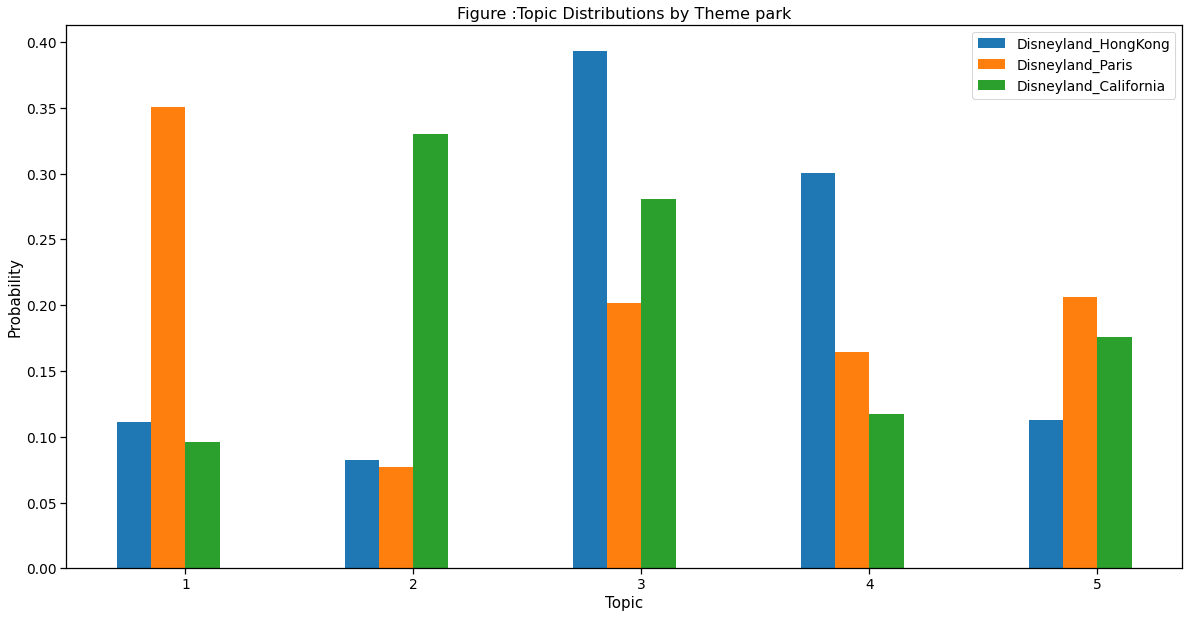

In [ ]:
import numpy as np

Selected_Countries = ['Disneyland_HongKong','Disneyland_Paris','Disneyland_California']

Group_Prob = []
for i in range(len(Selected_Countries)):
    ReducedTerm_Selected = ReducedCount[np.where(dl['Branch'] == Selected_Countries[i])]
    TopicDis_Doc = lda.transform(ReducedTerm_Selected) 
    Group_Prob.append(sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))) 
    
    
#Create a new figure
pyplot.figure(figsize=(20,10)) 
pyplot.title('Figure :Topic Distributions by Theme park', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15   
for i in range(len(Selected_Countries)):
    pyplot.bar(Bar_index + i*width, Group_Prob[i].tolist(), width,  label=Selected_Countries[i])
    
pyplot.xticks(Bar_index + 1.5*width, Bar_index)
pyplot.legend()
pyplot.show()

<h5> Interpretation-G</h5>
On visualising the distribution of topics among different theme parks, it has been observed that the concerns and interests of visitors different among the theme parks. 

- Concerns and interests of Disneyland_HongKong have been observed more in topic 3 and topic 4 as compared to the other two theme parks.
- Concerns and interest of Disneyland_Paris have been found mostly in topic 1 and topic 5 as compared to the other two theme parks.
- Comparatively, Disneyland_California has been stated more concerns and interest in topic 2


<h3>4.5.H: What are the differences in concerns and interests between major visitor groups when visiting theme park? </h3>

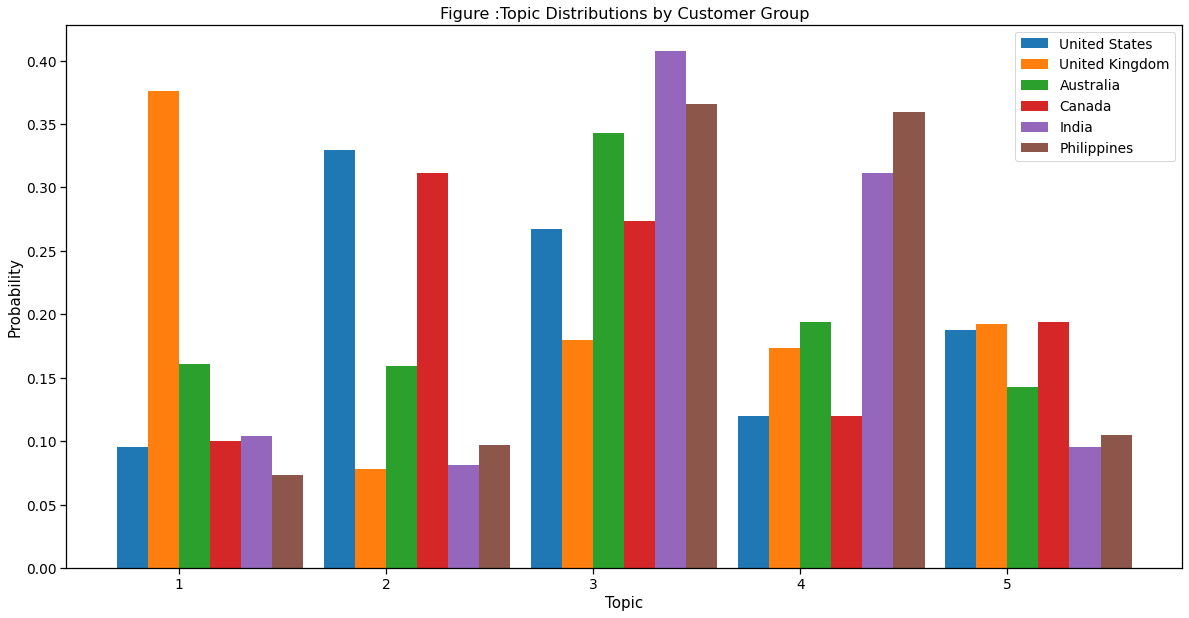

In [ ]:
import numpy as np

Selected_Countries = ['United States','United Kingdom','Australia','Canada','India','Philippines']

Group_Prob = []
for i in range(len(Selected_Countries)):
    ReducedTerm_Selected = ReducedCount[np.where(dl['Reviewer_Location'] == Selected_Countries[i])]
    TopicDis_Doc = lda.transform(ReducedTerm_Selected) 
    Group_Prob.append(sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))) 
    
    
#Create a new figure
pyplot.figure(figsize=(20,10)) 
pyplot.title('Figure :Topic Distributions by Visitor Location', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15   
for i in range(len(Selected_Countries)):
    pyplot.bar(Bar_index + i*width, Group_Prob[i].tolist(), width,  label=Selected_Countries[i])
    
pyplot.xticks(Bar_index + 1.5*width, Bar_index)
pyplot.legend()
pyplot.show()

<h5> Interpretation-H</h5>
After analysis of topics based on visitors, it has been observed that there are differences recorded in terms of concerns and interests from a significant group of visitor belonging from different locations.

- In Topic 1, visitors from the United Kingdom and Australia have shown most of the differences in concerns and interests.
- In Topic 2, visitors from the United States and Canada have shown most of the differences in concerns and interests.
- In Topic 3, visitors from India and the Philippines have shown most of the differences in concerns and interests.
- In Topic 4, visitors from India and the Philippines have shown most of the differences in concerns and interests.
- In Topic 5, visitors from the United States, United Kingdom and Canada have shown most of the differences in concerns and interests.